# Part II - (Dataset Exploration of Prosper Loan Data)
## by Pranav Naresh Medhi


## Investigation Overview


- Delinquencies in past 7 years have a direct relation with the clear visual that AA type Prosper Rating candidate having huge density around the median, where median is 0, as we go further with the types of Prosper Ratings we have minor spreading around the median signifying the increase in the Delinquency number.
- NonHomeowner have to pay more Interest (BorrowerRate) as compared to the homeowners. We can conclude that Homeowners have a higher chance of loan approval. One other observation is that ProsperRating Type HR have to pay the highest interest rates irrespective of their Homeowning status.
- EmploymentStatus also plays a huge role in the decision of the Loan Amount, As it was observed that the maximum loan amount allotted was to the type B ProsperRating individuals that were Employed, and had StatedMonthlyIncome between 8000-10000.
- Prosper Rating from AA to D have the higher loan amount allotted to them also that have more StatedMonthlyIncome as compared to the rest.
- Majority of the Borrowers are from the ProsperRating type B. Making it a point that there could be more chance of a loan being approved for type B ProsperRating Borrowers.
## Dataset Overview

Prosper Loan Data is a dataset that contains information about 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and various other variables, this is one of the most varied dataset I found which contains information on topics that could be used to monitor tonnes of trends.

In [11]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [12]:
# load in the dataset into a pandas dataframe
clean_df=pd.read_csv('clean_data.csv')

In [13]:
clean_df.columns

Index(['Term', 'LoanStatus', 'Yield', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating_numeric', 'ProsperRating_alpha', 'ProsperScore',
       'DelinquenciesLast7Years', 'ListingCategory_numeric',
       'EmploymentStatus', 'Occupation', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'StatedMonthlyIncome', 'IncomeVerifiable',
       'Recommendations', 'DebtToIncomeRatio', 'LoanAmount', 'PercentFunded',
       'IncomeRange', 'BorrowerState', 'Investors', 'CreditScoreRangeUpper',
       'MonthlyLoanPayment', 'LoanAmount_log', 'Investors_log'],
      dtype='object')

In [14]:
#ProsperRating Alpha is an Ordinal variable so we will be having to take care of the order, same for IncomeRange
ProsperRating_Alpha_portions = ['AA','A', 'B', 'C', 'D', 'E', 'HR']
IncomeRange_portions = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
pd_ver = pd.__version__.split(".")
#compatibility setting
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): 
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRating_Alpha_portions)
    clean_df['ProsperRating_alpha'] = clean_df['ProsperRating_alpha'].astype(vclasses)
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_portions)
    clean_df['IncomeRange'] = clean_df['IncomeRange'].astype(vclasses_1)
else: 
    clean_df['ProsperRating_alpha'] = clean_df['ProsperRating_alpha'].astype('category', ordered = True, categories = ProsperRating_Alpha_portions)
    clean_df['IncomeRange'] = clean_df['IncomeRange'].astype('category', ordered = True, categories = IncomeRange_portions)

In [15]:
clean_df_part = clean_df[(clean_df['StatedMonthlyIncome'] <= 10000) ]

## Delinquencies effects on the ProsperRatings

- Delinquencies in past 7 years have a direct relation with the clear visual that AA type Prosper Rating candidate having huge density around the median, where median is 0, as we go further with the types of Prosper Ratings we have minor spreading around the median signifying the increase in the Delinquency number.

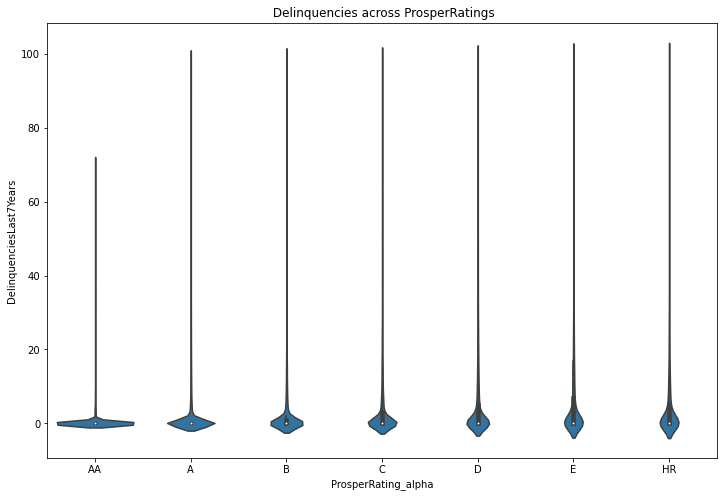

In [16]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [12, 8])
sb.violinplot(data = clean_df,x = 'ProsperRating_alpha', y = 'DelinquenciesLast7Years', color = base_color).set(title=' Delinquencies across ProsperRatings');

## Relation between Borrowrate, ProsperRating and HomeownerStatus

- NonHomeowner have to pay more Interest (BorrowerRate) as compared to the homeowners. We can conclude that Homeowners have a higher chance of loan approval. One other observation is that ProsperRating Type HR have to pay the highest interest rates irrespective of their Homeowning status.

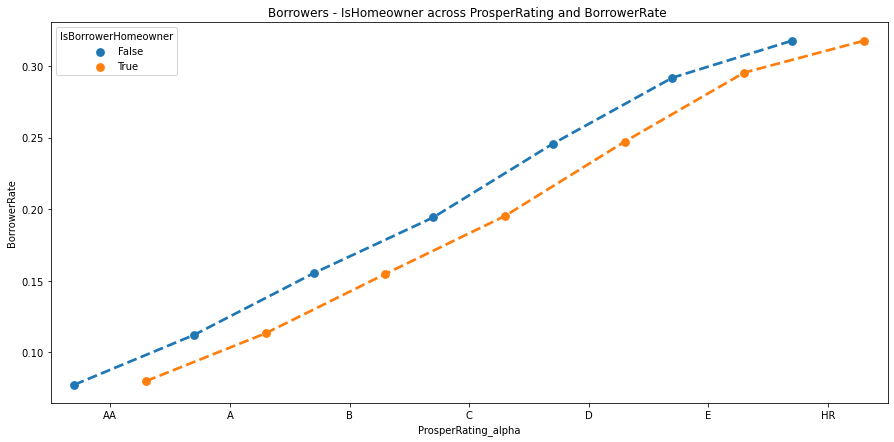

In [17]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = clean_df_part, x = 'ProsperRating_alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.6, linestyles = "--");
plt.title('Borrowers - IsHomeowner across ProsperRating and BorrowerRate ');

## EmploymentStatus,ProsperRatings and LoanOriginalAmount by StatedMonthlyIncome

- EmploymentStatus also plays a huge role in the decision of the Loan Amount, As it was observed that the maximum loan amount allotted was to the type B ProsperRating individuals that were Employed, and had StatedMonthlyIncome between 8000-10000.

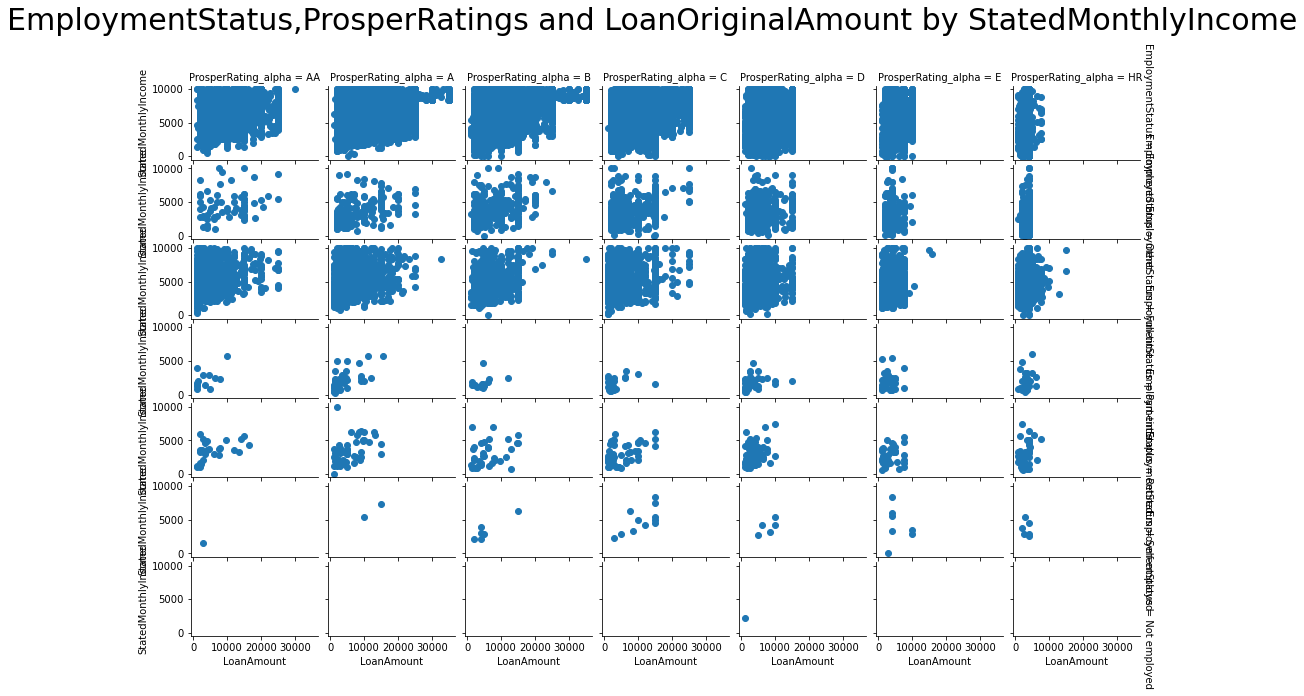

In [18]:
scattergrid = sb.FacetGrid(data = clean_df_part, col = 'ProsperRating_alpha', row = 'EmploymentStatus', size = 3, aspect=1,
                margin_titles = True)
scattergrid.map(plt.scatter, 'LoanAmount', 'StatedMonthlyIncome');
scattergrid.fig.subplots_adjust()
scattergrid.fig.suptitle('EmploymentStatus,ProsperRatings and LoanOriginalAmount by StatedMonthlyIncome',size=30,y=1.12);
scattergrid.fig.set_size_inches(14, 8);
#https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot

## LoanOriginalAmount , IncomeRange by ProsperRating Alpha relation

- Prosper Rating from AA to D have the higher loan amount allotted to them also that have more StatedMonthlyIncome as compared to the rest.
- Majority of the Borrowers are from the ProsperRating type B. Making it a point that there could be more chance of a loan being approved for type B ProsperRating Borrowers.

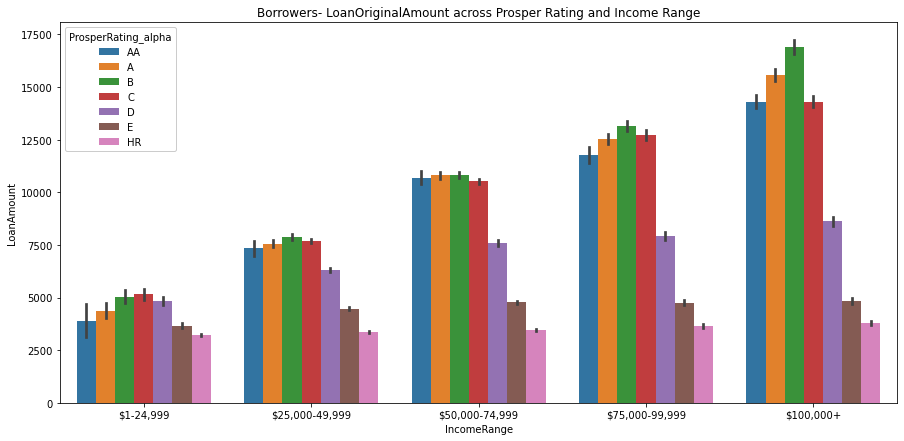

In [19]:
plt.figure(figsize = [15, 7])
clean_df_employ = clean_df[clean_df['EmploymentStatus'] != 'Not employed']
ax = sb.barplot(data = clean_df_employ, x = 'IncomeRange', y = 'LoanAmount', hue = 'ProsperRating_alpha')
ax.legend(loc = 'upper left', framealpha =1, title = 'ProsperRating_alpha')
plt.title('Borrowers- LoanOriginalAmount across Prosper Rating and Income Range');

## Conclusion
<strong>I would be concluding by saying that EmploymentStatus, ProsperRating, IncomeRange, StatedMonthlyIncome, DelinquenciesLast7Years, HomeownerStatus have direct impact on the loan approval chances of any given individual.</strong>

In [20]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 794646 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\prana\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\prana\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\prana\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\prana\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\prana\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
